# Architecture Diagrams

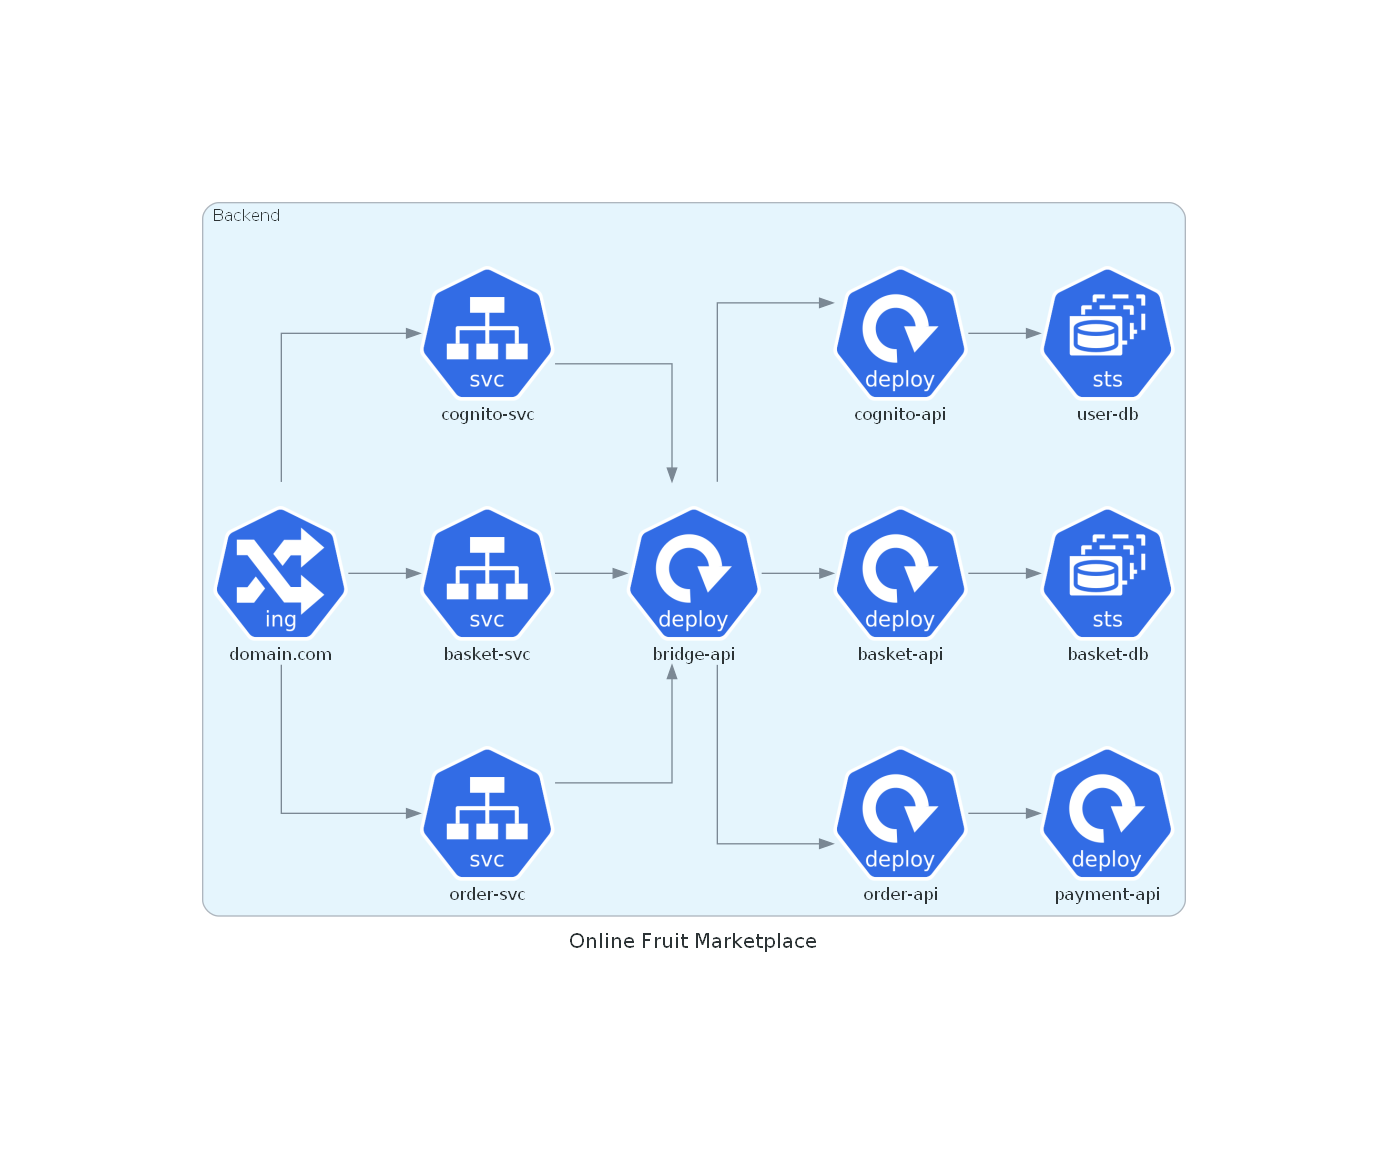

In [1]:
from diagrams import Cluster, Diagram
from diagrams.k8s.compute import Deployment, StatefulSet
from diagrams.k8s.network import Ingress, Service


with Diagram("Online Fruit Marketplace", show=False) as diag:
    with Cluster("Backend"):
        ingress = Ingress("domain.com")

        cognito_service = Service("cognito-svc")
        basket_service = Service("basket-svc")
        order_service = Service("order-svc")

        bridge_service = Deployment("bridge-api")

        ingress >> order_service
        ingress >> basket_service
        ingress >> cognito_service

        order_service >> bridge_service >> Deployment("order-api") >> Deployment("payment-api")
        basket_service >> bridge_service >> Deployment("basket-api") >> StatefulSet("basket-db")
        cognito_service >> bridge_service >> Deployment("cognito-api") >> StatefulSet("user-db")

diag
